****This analysis is to predict heart attack based on exams and individual characteristics using the various machine learning models****


******Analysis by BRIGHT ASANTE******

In [4]:
#IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [69]:
#IMPORTING DATASET
hrt_attack = pd.read_csv("heart_attack_prediction_dataset.csv")

******EXPLORING THE DATASET******

In [70]:
#HEAD OF THE DATASET
hrt_attack.head()

Patient ID  Age     Sex  Cholesterol Blood Pressure  Heart Rate  Diabetes  \
0    BMW7812   67    Male          208         158/88          72         0   
1    CZE1114   21    Male          389         165/93          98         1   
2    BNI9906   21  Female          324         174/99          72         1   
3    JLN3497   84    Male          383        163/100          73         1   
4    GFO8847   66    Male          318          91/88          93         1   

   Family History  Smoking  Obesity  ...  Sedentary Hours Per Day  Income  \
0               0        1        0  ...                 6.615001  261404   
1               1        1        1  ...                 4.963459  285768   
2               0        0        0  ...                 9.463426  235282   
3               1        1        0  ...                 7.648981  125640   
4               1        1        1  ...                 1.514821  160555   

         BMI  Triglycerides  Physical Activity Days Per Week  \
0  31.251233            286                                0   
1  27.194973            235                                1   
2  28.176571            587                                4   
3  36.464704            378                                3   
4  21.809144            231                                1   

   Sleep Hours Per Day    Country      Continent           Hemisphere  \
0                    6  Argentina  South America  Southern Hemisphere   
1                    7     Canada  North America  Northern Hemisphere   
2                    4     France         Europe  Northern Hemisphere   
3                    4     Canada  North America  Northern Hemisphere   
4                    5   Thailand           Asia  Northern Hemisphere   

   Heart Attack Risk  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  

[5 rows x 26 columns]

In [71]:
#DATA DESCRIPTION
hrt_attack.describe()

Age  Cholesterol   Heart Rate     Diabetes  Family History  \
count  8763.000000  8763.000000  8763.000000  8763.000000     8763.000000   
mean     53.707977   259.877211    75.021682     0.652288        0.492982   
std      21.249509    80.863276    20.550948     0.476271        0.499979   
min      18.000000   120.000000    40.000000     0.000000        0.000000   
25%      35.000000   192.000000    57.000000     0.000000        0.000000   
50%      54.000000   259.000000    75.000000     1.000000        0.000000   
75%      72.000000   330.000000    93.000000     1.000000        1.000000   
max      90.000000   400.000000   110.000000     1.000000        1.000000   

           Smoking      Obesity  Alcohol Consumption  Exercise Hours Per Week  \
count  8763.000000  8763.000000          8763.000000              8763.000000   
mean      0.896839     0.501426             0.598083                10.014284   
std       0.304186     0.500026             0.490313                 5.783745   
min       0.000000     0.000000             0.000000                 0.002442   
25%       1.000000     0.000000             0.000000                 4.981579   
50%       1.000000     1.000000             1.000000                10.069559   
75%       1.000000     1.000000             1.000000                15.050018   
max       1.000000     1.000000             1.000000                19.998709   

       Previous Heart Problems  Medication Use  Stress Level  \
count              8763.000000     8763.000000   8763.000000   
mean                  0.495835        0.498345      5.469702   
std                   0.500011        0.500026      2.859622   
min                   0.000000        0.000000      1.000000   
25%                   0.000000        0.000000      3.000000   
50%                   0.000000        0.000000      5.000000   
75%                   1.000000        1.000000      8.000000   
max                   1.000000        1.000000     10.000000   

       Sedentary Hours Per Day         Income          BMI  Triglycerides  \
count              8763.000000    8763.000000  8763.000000    8763.000000   
mean                  5.993690  158263.181901    28.891446     417.677051   
std                   3.466359   80575.190806     6.319181     223.748137   
min                   0.001263   20062.000000    18.002337      30.000000   
25%                   2.998794   88310.000000    23.422985     225.500000   
50%                   5.933622  157866.000000    28.768999     417.000000   
75%                   9.019124  227749.000000    34.324594     612.000000   
max                  11.999313  299954.000000    39.997211     800.000000   

       Physical Activity Days Per Week  Sleep Hours Per Day  Heart Attack Risk  
count                      8763.000000          8763.000000        8763.000000  
mean                          3.489672             7.023508           0.358211  
std                           2.282687             1.988473           0.479502  
min                           0.000000             4.000000           0.000000  
25%                           2.000000             5.000000           0.000000  
50%                           3.000000             7.000000           0.000000  
75%                           5.000000             9.000000           1.000000  
max                           7.000000            10.000000           1.000000

In [72]:
#NUMBER OF ROWS AND COLUMNS
hrt_attack.shape

(8763, 26)

In [73]:
#MISSING VALUES
hrt_attack.isna().sum()

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

In [74]:
#DUPLICATED VALUES
hrt_attack.duplicated().sum()

0

In [75]:
hrt_attack.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')

******VISUALIZATION******


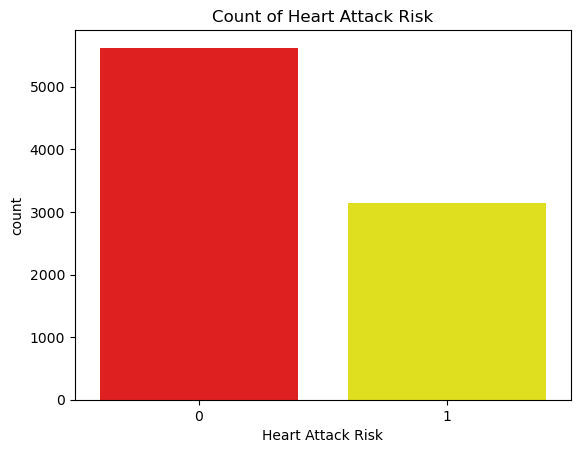

In [18]:
#COUNT OF HEART ATTACK RISK
custom_colors= ['red','yellow']
sns.countplot(x='Heart Attack Risk', data=hrt_attack, palette=custom_colors)
plt.xlabel('Heart Attack Risk')
plt.ylabel('count')
plt.title('Count of Heart Attack Risk')
plt.show()

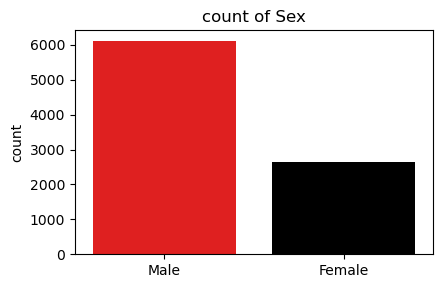

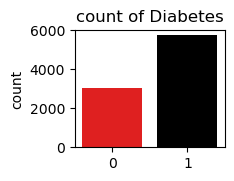

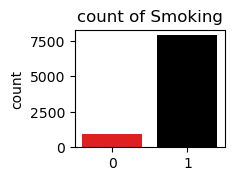

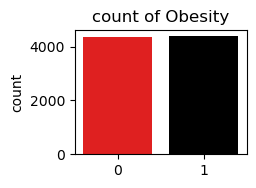

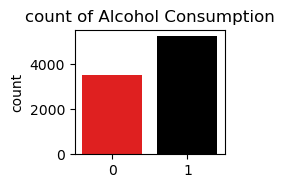

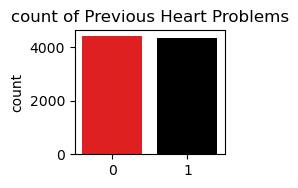

In [39]:
plt.figure(figsize=(12,8))
features=['Sex','Diabetes','Smoking','Obesity','Alcohol Consumption','Previous Heart Problems']
#ITERATE THROUGH EACH FEATIRES AND CREATE A COUNT PLOT
for i, feature in enumerate(features, start=1):
    plt.subplot(3,3,i)
    custom_colors=['red','black']
    sns.countplot(x=feature, data=hrt_attack, palette=custom_colors)
    plt.xlabel('')
    plt.ylabel('count')
    plt.title(f'count of {feature}')
    plt.tight_layout()
    plt.show()



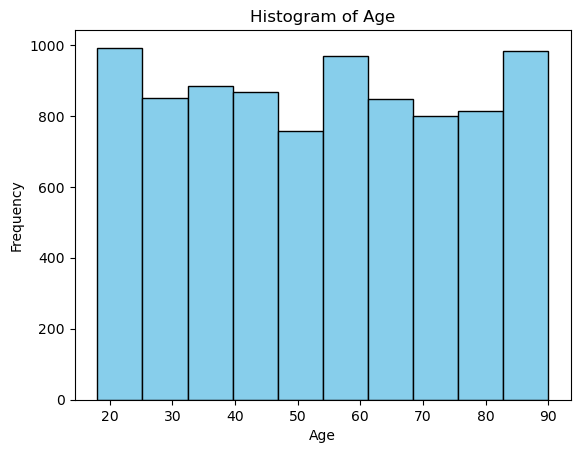

In [27]:
# Histogram of 'Age'
plt.hist(hrt_attack['Age'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

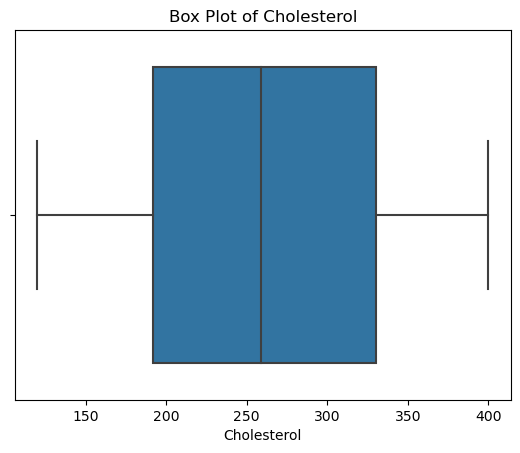

In [28]:
# Box plot of 'Cholesterol'
sns.boxplot(x='Cholesterol', data=hrt_attack)
plt.title('Box Plot of Cholesterol')
plt.show()

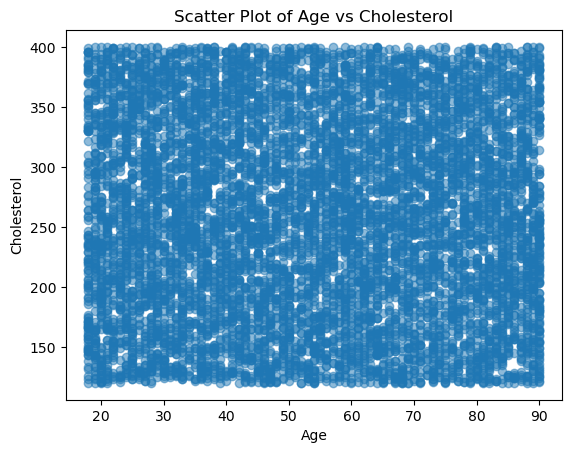

In [29]:
# Scatter plot of 'Age' vs 'Cholesterol'
plt.scatter(hrt_attack['Age'], hrt_attack['Cholesterol'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Scatter Plot of Age vs Cholesterol')
plt.show()

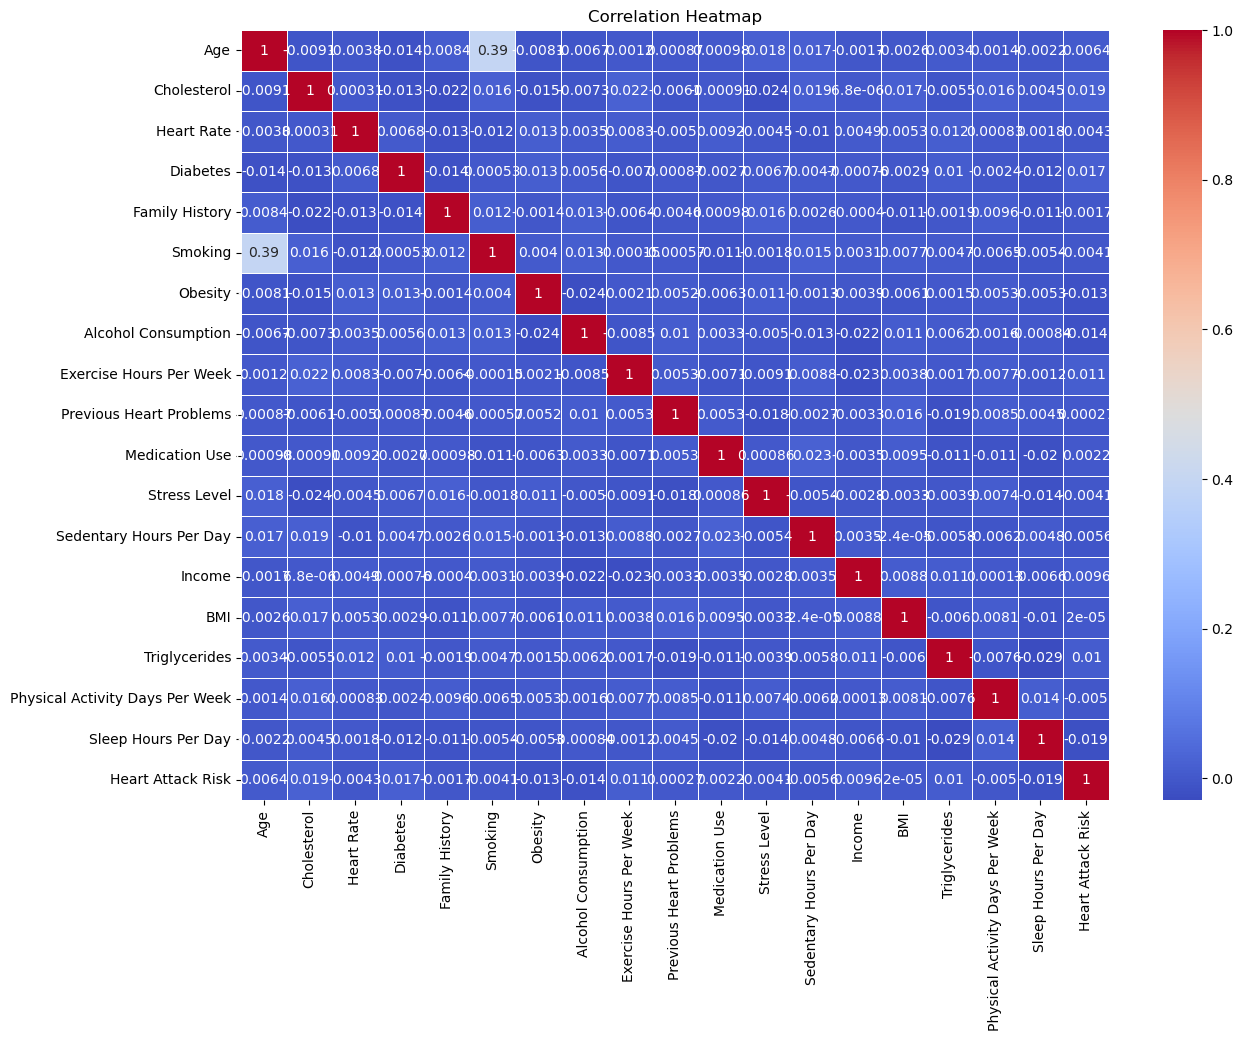

In [35]:
# Correlation heatmap
plt.figure(figsize=(14,10))
correlation_matrix = hrt_attack.corr()
sns.heatmap(correlation_matrix, annot=True, linewidths=0.4,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

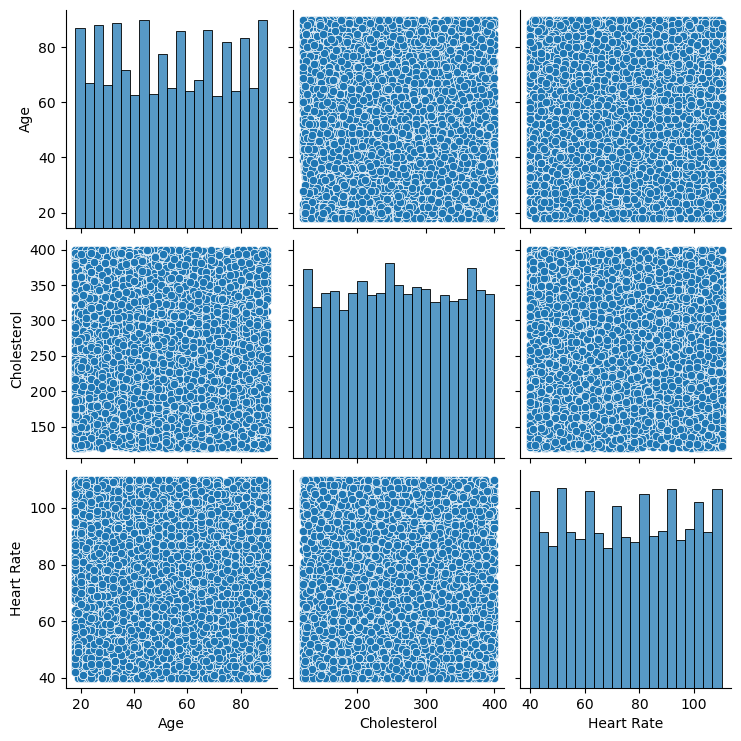

In [36]:
# Pair plot of numerical features
sns.pairplot(hrt_attack[['Age', 'Cholesterol', 'Blood Pressure', 'Heart Rate']])
plt.show()

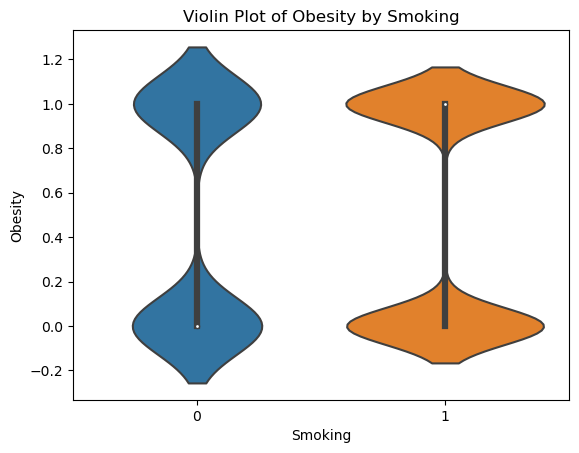

In [37]:
# Violin plot of 'Obesity' across 'Smoking' categories
sns.violinplot(x='Smoking', y='Obesity', data=hrt_attack)
plt.title('Violin Plot of Obesity by Smoking')
plt.show()

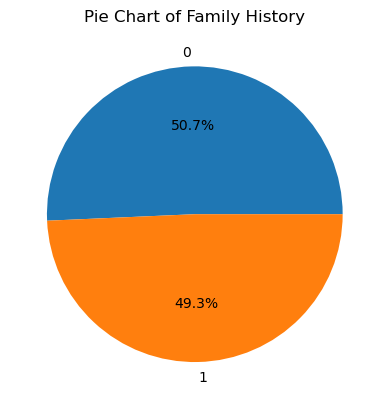

In [38]:
# Pie chart of 'Family History'
family_history_counts = hrt_attack['Family History'].value_counts()
plt.pie(family_history_counts, labels=family_history_counts.index, autopct='%1.1f%%')
plt.title('Pie Chart of Family History')
plt.show()

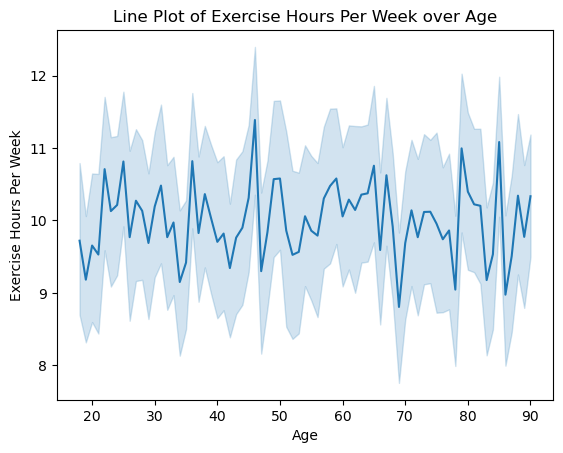

In [40]:
# Line plot of 'Exercise Hours Per Week' over 'Age'
sns.lineplot(x='Age', y='Exercise Hours Per Week', data=hrt_attack)
plt.title('Line Plot of Exercise Hours Per Week over Age')
plt.show()

******ENCODING CATEGORICAL VARIABLES******

In [76]:
# Split 'Blood Pressure' column into 'Systolic' and 'Diastolic' columns
hrt_attack[['Systolic', 'Diastolic']] = hrt_attack['Blood Pressure'].str.split('/', expand=True)


In [77]:
# Convert 'Systolic' and 'Diastolic' columns to numeric type
hrt_attack['Systolic'] = pd.to_numeric(hrt_attack['Systolic'])
hrt_attack['Diastolic'] = pd.to_numeric(hrt_attack['Diastolic'])

In [87]:
# 1 for Southern Hemisphere, 0 for Northern Hemisphere
hrt_attack['Hemisphere'].replace({'Southern Hemisphere': 1, 'Northern Hemisphere': 0}, inplace=True)

In [88]:
# 1 for Male, 0 for Female
hrt_attack['Sex'].replace({'Male': 1, 'Female': 0}, inplace=True)

In [90]:
hrt_attack['Diet'].replace({'Average':0, 'Unhealthy':1, 'Healthy':2}, inplace=True);

In [91]:
hrt_attack.head()

Patient ID  Age  Sex  Cholesterol Blood Pressure  Heart Rate  Diabetes  \
0    BMW7812   67    1          208         158/88          72         0   
1    CZE1114   21    1          389         165/93          98         1   
2    BNI9906   21    0          324         174/99          72         1   
3    JLN3497   84    1          383        163/100          73         1   
4    GFO8847   66    1          318          91/88          93         1   

   Family History  Smoking  Obesity  ...        BMI  Triglycerides  \
0               0        1        0  ...  31.251233            286   
1               1        1        1  ...  27.194973            235   
2               0        0        0  ...  28.176571            587   
3               1        1        0  ...  36.464704            378   
4               1        1        1  ...  21.809144            231   

   Physical Activity Days Per Week  Sleep Hours Per Day    Country  \
0                                0                    6  Argentina   
1                                1                    7     Canada   
2                                4                    4     France   
3                                3                    4     Canada   
4                                1                    5   Thailand   

       Continent  Hemisphere  Heart Attack Risk  Systolic  Diastolic  
0  South America           1                  0       158         88  
1  North America           0                  0       165         93  
2         Europe           0                  0       174         99  
3  North America           0                  0       163        100  
4           Asia           0                  0        91         88  

[5 rows x 28 columns]

In [96]:
#Selecting independent and dependent variables
independent = ['Age','Sex','Cholesterol','Heart Rate','Diabetes','Family History','Smoking','Obesity','Alcohol Consumption','Exercise Hours Per Week','Diet','Previous Heart Problems','Medication Use','Stress Level','Sedentary Hours Per Day','Income','BMI','Triglycerides','Physical Activity Days Per Week','Sleep Hours Per Day','Systolic','Diastolic','Hemisphere']

X=hrt_attack[independent]

y=hrt_attack['Heart Attack Risk']


In [97]:
#Spliting training dataset into 80% train and 20% test data

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)


******MODEL BUILDING******

******LOGISTIC REGRESSION******

In [100]:
log_reg_model=LogisticRegression()
log_reg_model.fit(X_train,y_train)

LogisticRegression()

In [108]:
#Predicting Heart Attack Risk in the Test data
Prediction= log_reg_model.predict(X_test)

In [109]:
#Accuracy of the model
accuracy_score(y_test,Prediction)

0.6417569880205363

******RANDOM FOREST CLASSIFIER******

In [113]:
rand_for_model= RandomForestClassifier(random_state=42)
rand_for_model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [115]:
#Predicting Heart Attack Risk in the Test data
Prediction_random= rand_for_model.predict(X_test)

In [116]:
#Accuracy of the model
accuracy_score(y_test,Prediction_random)

0.6377638334284085

******DECISION TREE REGRESSOR******

In [118]:
decision_tree_model= DecisionTreeRegressor(random_state=1)
decision_tree_model.fit(X_train,y_train)

DecisionTreeRegressor(random_state=1)

In [120]:
#Predicting Heart Attack Risk in the Test data
Prediction_decision_tree= decision_tree_model.predict(X_test)

array([0., 0., 1., ..., 0., 1., 0.])

In [121]:
#Accuracy of the model
accuracy_score(y_test,Prediction_decision_tree)

0.54249857387336

******SUPPORT VECTOR MACHINE******

In [123]:
svm_model= SVC()
svm_model.fit(X_train,y_train)

SVC()

In [125]:
#Predicting Heart Attack Risk in the Test data
Prediction_svm= svm_model.predict(X_test)

In [126]:
#Accuracy of the model
accuracy_score(y_test,Prediction_svm)

0.6417569880205363

******K-NEAREST NEIGHBORS******

In [128]:
knn_model= KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [131]:
#Predicting Heart Attack Risk in the Test data
Prediction_knn= knn_model.predict(X_test)

C:\Users\brigh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [132]:
#Accuracy of the model
accuracy_score(y_test,Prediction_knn)

0.5590416428978894

******NAIVE BAYES******

In [137]:
nb_model= GaussianNB()
nb_model.fit(X_train,y_train)

GaussianNB()

In [138]:
#Predicting Heart Attack Risk in the Test data
Prediction_nb= nb_model.predict(X_test)

In [140]:
#Accuracy of the model
accuracy_score(y_test,Prediction_nb)

0.6417569880205363

*******END!!!******